In [158]:
#LOGISTIC REGRESSION

In [159]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (7,4)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

In [160]:
df = pd.read_csv(r'C:\Users\fatih\Downloads\hearing_test.csv')
df

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
...,...,...,...
4995,73.0,3.9,0
4996,57.0,33.9,1
4997,49.0,34.5,1
4998,38.0,46.4,1


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [162]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.0,51.60900,11.287001,18.0,43.0,51.0,60.0,90.0
physical_score,5000.0,32.76026,8.169802,-0.0,26.7,35.3,38.9,50.0
test_result,5000.0,0.60000,0.489947,0.0,0.0,1.0,1.0,1.0


In [163]:
df["test_result"].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

In [164]:
df["test_result"]

0       1
1       1
2       0
3       0
4       1
       ..
4995    0
4996    1
4997    1
4998    1
4999    1
Name: test_result, Length: 5000, dtype: int64

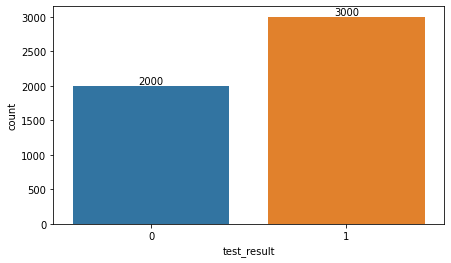

In [165]:
ax = sns.countplot(x="test_result", data=df)
ax.bar_label(ax.containers[0]);


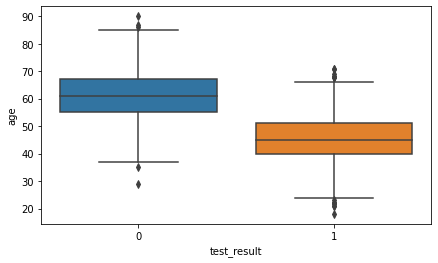

In [166]:
sns.boxplot(x="test_result", y="age", data=df);

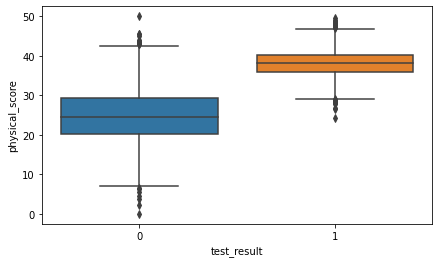

In [167]:
sns.boxplot(x='test_result',y='physical_score',data=df);

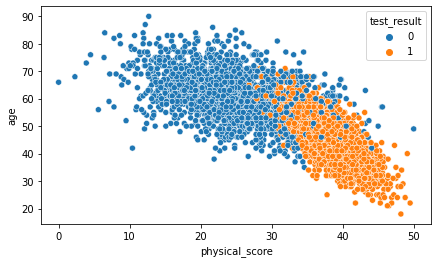

In [168]:
sns.scatterplot(x="physical_score", y="age", hue="test_result", data=df);

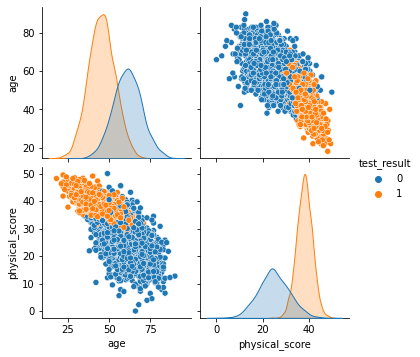

In [169]:
sns.pairplot(df,hue='test_result');

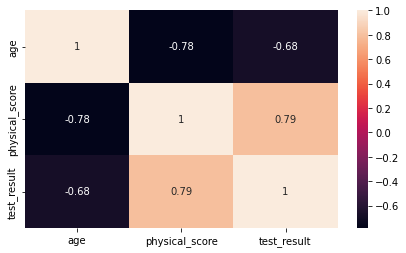

In [170]:
sns.heatmap(df.corr(), annot=True);

In [171]:
#Train/Test Split

In [172]:
X = df.drop("test_result", axis=1)
y = df["test_result"]

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [174]:
X_train , X_test, y_train, y_test  = train_test_split(X,y, test_size=0.1, random_state =101)

In [175]:
# MODELLING

In [176]:
from sklearn.linear_model import LogisticRegression

In [177]:
log_model = LogisticRegression()

In [178]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [179]:
df

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
...,...,...,...
4995,73.0,3.9,0
4996,57.0,33.9,1
4997,49.0,34.5,1
4998,38.0,46.4,1


In [180]:
## Interpretation of coefficients

In [181]:
log_model.coef_

array([[-0.08365972,  0.43251827]])

In [182]:
log_model.intercept_

array([-9.35047287])

In [183]:
b2, b1 = log_model.coef_[0]
print("b2 (age coef)       :", b2)
print("b1 (physical_score) :", b1)

b2 (age coef)       : -0.08365972134083322
b1 (physical_score) : 0.4325182652459212


In [184]:
b0 = log_model.intercept_[0]
print("b0 (intercept) :", b0)

b0 (intercept) : -9.350472872727694


In [185]:
## Linear to Sigmoid Conversion

In [186]:
**The probability** that an event will occur is the possibility you expect to see that event in many trials. 

**Probabilities** always range between 0 and 1. 

**The odds** are defined as the probability that the event will occur divided by the probability that the event will not occur.

SyntaxError: invalid syntax (4269564112.py, line 1)

In [ ]:
def sigmoid(age, physical_score):

    log_odds = b2*age + b1*physical_score + b0 # b2*X2 + b1*X1 + b0
    probability = 1 / (1+np.exp(-log_odds))
    return probability


In [ ]:
### The probability and odds of passing the hearing test for age = 33, physical_score= 40

In [ ]:
proba_age_33_ps_40 = sigmoid(33, 40)
proba_age_33_ps_40

# When someone who has 33 years old and also 4o at physical score 
# is going to pass the test %99.45

0.9944560404714694

In [ ]:
odds_age_33_ps_40 = proba_age_33_ps_40/ (1-proba_age_33_ps_40)
odds_age_33_ps_40

# This person has 179 times more tend to pass instead of fail

179.37649713237465

In [ ]:
### The probability and odds of passing the hearing test for age = 34, physical_score= 40

# When we increase the age parameter by 1 point let's see what is happening

In [ ]:
proba_age_34_ps_40 = sigmoid(34, 40)
proba_age_34_ps_40

# As we can see probability of passing test little bit descreased

0.9939751954408242

In [ ]:
odds_age_34_ps_40 = proba_age_34_ps_40/ (1-proba_age_34_ps_40)
odds_age_34_ps_40 # np.log(odds_age_34_ps_40) = b2*34 + b1*40 + b0

# This person has 164 times more tend to pass instead of fail

164.98048786113793

In [ ]:
odds_age_33_ps_40 / odds_age_34_ps_40 # decrease in age by one unit increases the odds of passing the hearing test by 8.7%

1.0872588598680448

In [ ]:
## Modeling with Scaling Data

In [ ]:
#What happens can be described as follows:

#Step 1: The data are split into TRAINING data and TEST data according to ratio of train_test_split

#Step 2: the scaler is fitted on the numeric features of TRAINING data
    
#Step 3: the scaler transforms the numeric features of TRAINING data

#Step 4: the models are fitted/trained using the transformed TRAINING data

#Step 5: the scaler transforms the numeric features of TEST data according to TRAINING data

#Step 6: the trained models predict using the transformed TEST data



#pipe_model.fit(X_train, y_train) --> scaler.fit(X_train)     
#                                 --> scaler.transform(X_train)
#                                 --> lojistic.fit(X_train_scaled, y_train)

#pipe_model.predict(X_test)       --> scaler.transform(X_test) 
#                                 --> lojistic.predict(X_test_scaled)

In [ ]:
from sklearn.pipeline import Pipeline

operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [ ]:
pipe_model["logistic"].coef_

array([[-0.94953524,  3.45991194]])

In [ ]:
pipe_model["logistic"].intercept_

array([0.48867341])

In [ ]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [ ]:
y_pred = pipe_model.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [ ]:
y_pred_proba = pipe_model.predict_proba(X_test)
y_pred_proba

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

In [ ]:
## X_test + y_yest + y_pred + y_pred_proba

In [ ]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data


,age,physical_score,test_result
1718,39.0,37.8,1
2511,45.0,38.7,1
345,56.0,21.8,0
2521,40.0,44.0,1
54,64.0,25.4,0
...,...,...,...
4770,46.0,37.7,1
188,59.0,36.5,1
3335,54.0,22.8,0
4583,58.0,20.5,0


In [ ]:
test_data["pred_proba"] = y_pred_proba[:,1]
test_data

,age,physical_score,test_result,pred_proba
1718,39.0,37.8,1,0.976157
2511,45.0,38.7,1,0.973076
345,56.0,21.8,0,0.010806
2521,40.0,44.0,1,0.998092
54,64.0,25.4,0,0.024987
...,...,...,...,...
4770,46.0,37.7,1,0.955993
188,59.0,36.5,1,0.813195
3335,54.0,22.8,0,0.019392
4583,58.0,20.5,0,0.005285


In [ ]:
test_data["pred"] = y_pred
test_data

,age,physical_score,test_result,pred_proba,pred
1718,39.0,37.8,1,0.976157,1
2511,45.0,38.7,1,0.973076,1
345,56.0,21.8,0,0.010806,0
2521,40.0,44.0,1,0.998092,1
54,64.0,25.4,0,0.024987,0
...,...,...,...,...,...
4770,46.0,37.7,1,0.955993,1
188,59.0,36.5,1,0.813195,1
3335,54.0,22.8,0,0.019392,0
4583,58.0,20.5,0,0.005285,0


In [ ]:
test_data.sample(10)


,age,physical_score,test_result,pred_proba,pred
2308,37.0,41.5,1,0.995730,1
2588,41.0,41.9,1,0.994953,1
4953,46.0,36.2,1,0.919942,1
755,76.0,28.5,0,0.033521,0
4287,48.0,41.1,1,0.987295,1
3903,43.0,40.5,1,0.989235,1
1331,49.0,37.7,1,0.944013,1
1484,44.0,32.2,1,0.713457,1
3050,45.0,24.0,0,0.065764,0
3095,52.0,19.3,0,0.005270,0


In [ ]:
## Model Performance on Classification Tasks

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [ ]:
accuracy_score(y_test,y_pred)

# This function show how much our model imply real world

0.93

In [ ]:
pipe_model.score(X_test, y_test)

# This function also show how much our model imply real world

0.93

In [ ]:
precision_score(y_test, y_pred, pos_label=1)

# Default is 1 and also show what percentage of data shows the real life

0.9331210191082803

In [ ]:
recall_score(y_test,y_pred, pos_label=1)

# Default is also 1

0.9543973941368078

In [ ]:
f1_score(y_test, y_pred)

# This function harmonic mean of the recall and presicion functions.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)

# Simple way of the showing matrix

array([[172,  21],
       [ 14, 293]], dtype=int64)

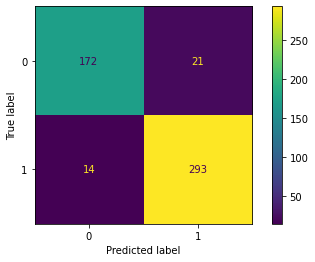

In [ ]:
plot_confusion_matrix(pipe_model ,X_test, y_test);

In [ ]:
def eval_metric(model, X_train, y_train , X_test , y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
eval_metric(pipe_model, X_train, y_train , X_test , y_test)

Test_Set
[[172  21]
 [ 14 293]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500


Train_Set
[[1567  240]
 [ 147 2546]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1807
           1       0.91      0.95      0.93      2693

    accuracy                           0.91      4500
   macro avg       0.91      0.91      0.91      4500
weighted avg       0.91      0.91      0.91      4500



In [ ]:
## Cross Validate

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()


# We just take  'accuracy', 'precision','recall','f1'functions

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_s

In [ ]:
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train , scoring= ['accuracy', 'precision','recall','f1'], cv=10, return_train_score= True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores


,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
1,0.031731,0.000000,0.900000,0.915802,0.889273,0.915072,0.951852,0.947173,0.919499,0.930846
2,0.011978,0.005184,0.924444,0.912346,0.921429,0.911952,0.955556,0.944697,0.938182,0.928036
3,0.008002,0.000000,0.935556,0.911358,0.916955,0.912470,0.981481,0.942220,0.948122,0.927107
4,0.007980,0.000000,0.931111,0.912099,0.937500,0.911624,0.947955,0.944719,0.942699,0.927877
5,0.016029,0.000000,0.937778,0.911111,0.941392,0.911483,0.955390,0.943069,0.948339,0.927007
6,0.015098,0.009562,0.902222,0.916296,0.934363,0.915504,0.899628,0.947607,0.916667,0.931279
7,0.010110,0.009792,0.897778,0.916296,0.888502,0.916833,0.947955,0.945957,0.917266,0.931168
8,0.008000,0.012525,0.911111,0.914321,0.896194,0.913580,0.962825,0.946370,0.928315,0.929686
9,0.012234,0.009246,0.891111,0.916296,0.910448,0.916168,0.907063,0.946782,0.908752,0.931223
10,0.012406,0.000000,0.915556,0.914074,0.911032,0.913217,0.951673,0.946370,0.930909,0.929498


In [ ]:
df_scores.mean()[2:]

# We look at overfitting problem, as we can see we dont have overfitting problem 

test_accuracy      0.914667
train_accuracy     0.914000
test_precision     0.914709
train_precision    0.913790
test_recall        0.946138
train_recall       0.945496
test_f1            0.929875
train_f1           0.929373
dtype: float64

In [ ]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

# This shows final results. We can compare these with cv reults , if both are relatable
# we can give this to customer

Test_Set
[[172  21]
 [ 14 293]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500


Train_Set
[[1567  240]
 [ 147 2546]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1807
           1       0.91      0.95      0.93      2693

    accuracy                           0.91      4500
   macro avg       0.91      0.91      0.91      4500
weighted avg       0.91      0.91      0.91      4500



In [ ]:
## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [ ]:
##Purpose of ROC Curve:

#    1. Analysing the strength/predictive power of a classifier.
    
 #   2. Determining optimal threshold.
    
  #  3. Comparing two models (using Area Under the Curve).

In [ ]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, average_precision_score

# We can use ROC-AUC score if our data is consistent
# if it is not we can use average presicion

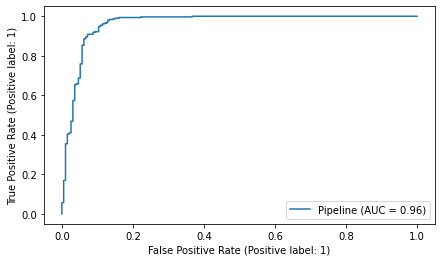

In [ ]:
plot_roc_curve(pipe_model, X_test ,y_test);

# Our data is consistent thtas why we can use plot_roc_curve

In [187]:
roc_auc_score(y_test, y_pred_proba[:,1])


# Our data can predict %96 of reality

0.9630132824762451

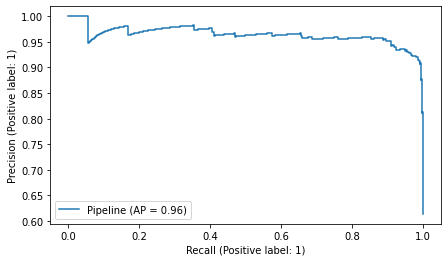

In [ ]:
plot_precision_recall_curve(pipe_model, X_test, y_test);

In [ ]:
average_precision_score(y_test, y_pred_proba[:,1])

0.9638330007940177